<a href="https://colab.research.google.com/github/Sugandaram/Guvi_Tasks/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model





from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
import seaborn as sns

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
df = pd.read_csv("car_data.csv")

In [ ]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [ ]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [ ]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:

df.drop_duplicates().sum()

Price                                            16964398.790701
Mileage                                              15924897.25
Make           BuickBuickBuickBuickBuickBuickBuickBuickBuickB...
Model          CenturyCenturyCenturyCenturyCenturyCenturyCent...
Trim           Sedan 4DSedan 4DSedan 4DSedan 4DSedan 4DSedan ...
Type           SedanSedanSedanSedanSedanSedanSedanSedanSedanS...
Cylinder                                                    4236
Liter                                                     2442.0
Doors                                                       2836
Cruise                                                       605
Sound                                                        546
Leather                                                      582
transformed                                        109971.485118
dtype: object

Tasks, Part 1
1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.) bold text

In [ ]:
x = df ["Mileage"]
y = df ["Price"]

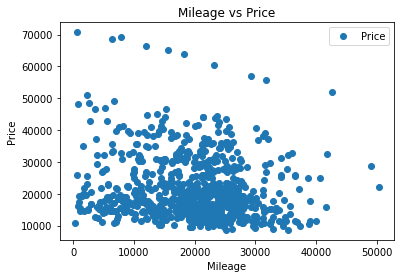

In [ ]:
df.plot(x = "Mileage", y = "Price", style = "o")

plt.title("Mileage vs Price")
plt.ylabel("Price")
plt.show()


In [ ]:
df[["Price", "Mileage"]].corr()

,Price,Mileage
Price,1.000000,-0.143051
Mileage,-0.143051,1.000000


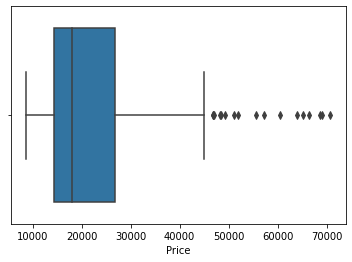

In [ ]:
sns.boxplot(x = 'Price',data = df)


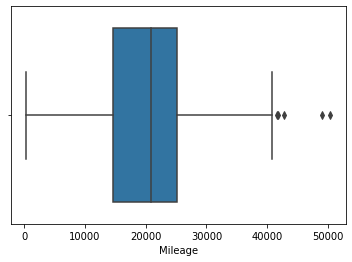

In [ ]:
sns.boxplot(x = 'Mileage',data = df)

In [ ]:
for i in ['Price','Mileage']:
  p25 = df[i].quantile(0.25)
  p75 = df[i].quantile(0.75)
  iqr = p75 - p25
  upper_limit = p75 + (iqr * 1.5)
  lower_limit = p25 - (iqr * 1.5)
  print(i," Upper_Limit :",upper_limit," Lower_Limit :",lower_limit)

  df[i] = np.where(
    df[i]>upper_limit,
    upper_limit,
    np.where(
        df[i]<lower_limit,
        lower_limit,
        df[i]
      )
  )

Price  Upper_Limit : 45383.68078365926  Lower_Limit : -4393.290277667038
Mileage  Upper_Limit : 41097.25  Lower_Limit : -1260.75


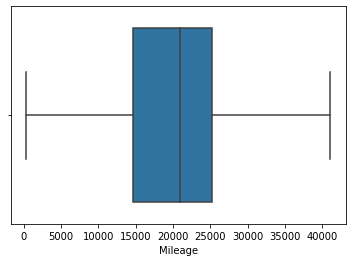

In [ ]:
sns.boxplot(x = 'Mileage',data = df)

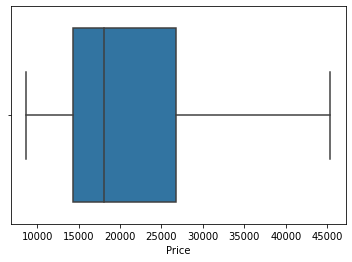

In [ ]:
sns.boxplot(x = 'Price',data = df)


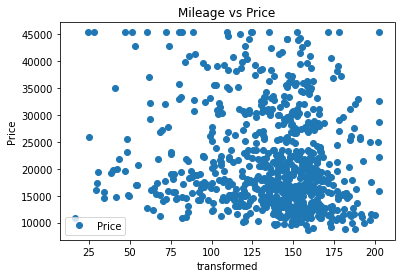

In [ ]:
df["transformed"] = np.sqrt(df["Mileage"])
df.plot(x = "transformed", y = "Price", style = "o")
plt.title("Mileage vs Price")
plt.ylabel("Price")
plt.show()

In [ ]:
df[["Price","transformed"]].corr()

,Price,transformed
Price,1.000000,-0.139577
transformed,-0.139577,1.000000


In [ ]:
df[["Mileage","transformed"]].corr()

,Mileage,transformed
Mileage,1.000000,0.981102
transformed,0.981102,1.000000


In [ ]:
X = df.loc[:, ['Mileage']].values 
y = df.loc[:, 'Price'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 


In [ ]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(643, 1)
(161, 1)


In [ ]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()   
regressor.fit(X_train_scaled, y_train)

y_pred = regressor.predict(X_test_scaled) 
y_pred

array([22975.25950558, 21300.42138283, 20872.984122  , 22803.00866913,
       19717.37948773, 23775.37527368, 17466.90990458, 20638.53159461,
       20565.51992319, 20966.37526481, 23160.80130164, 18693.62117272,
       20931.81876984, 21631.98652172, 20793.06115159, 22714.04784619,
       22299.19269379, 24542.70667475, 24584.70610709, 19538.04013949,
       22550.30322388, 18838.58123879, 20716.85964987, 23646.89599752,
       22567.84729056, 23724.16077601, 21202.95434574, 21741.68124164,
       24610.22474953, 17466.90990458, 20937.66679207, 21044.88053286,
       21241.0550966 , 23499.80937791, 20855.79448091, 19119.2863056 ,
       21524.94999372, 20415.06626048, 20935.00860015, 22569.61941851,
       19920.99698885, 20434.91409349, 21000.0456958 , 20714.55588353,
       20817.69373005, 20637.82274343, 22202.25729508, 23375.58320882,
       18430.10574699, 19968.66723062, 22058.00608019, 21238.21969189,
       21720.59291907, 21398.77448389, 20941.21104796, 22467.72206155,
      

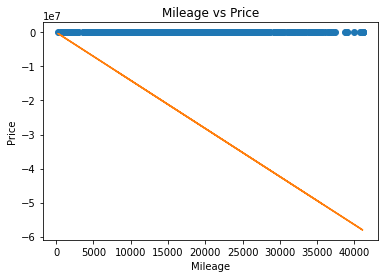

In [ ]:
y_pred = regressor.predict(X) 
plt.plot(X, y, 'o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.plot(X, y_pred)

In [ ]:
from sklearn import metrics
y_pred = regressor.predict(X_test_scaled) 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: -0.011072739351832839


## **Task 2**

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find    the linear regression equation.
2. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price. 

In [ ]:
x = df1= df[['Mileage','Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather','Price']]
#y = df1= df['Price']

In [ ]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [ ]:
print(df1.shape)

(804, 8)


In [ ]:
df1.head()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Price
0,8221.0,6,3.1,4,1,1,1,17314.103129
1,9135.0,6,3.1,4,1,1,0,17542.036083
2,13196.0,6,3.1,4,1,1,0,16218.847862
3,16342.0,6,3.1,4,1,0,0,16336.913140
4,19832.0,6,3.1,4,1,0,1,16339.170324


In [ ]:
df1.dtypes

Mileage     float64
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
Price       float64
dtype: object

In [ ]:
df1.isnull().sum()

Mileage     0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
Price       0
dtype: int64

In [ ]:
df1.duplicated().sum()


0

In [ ]:
df1.drop_duplicates().sum()

Mileage     1.592490e+07
Cylinder    4.236000e+03
Liter       2.442000e+03
Doors       2.836000e+03
Cruise      6.050000e+02
Sound       5.460000e+02
Leather     5.820000e+02
Price       1.696440e+07
dtype: float64

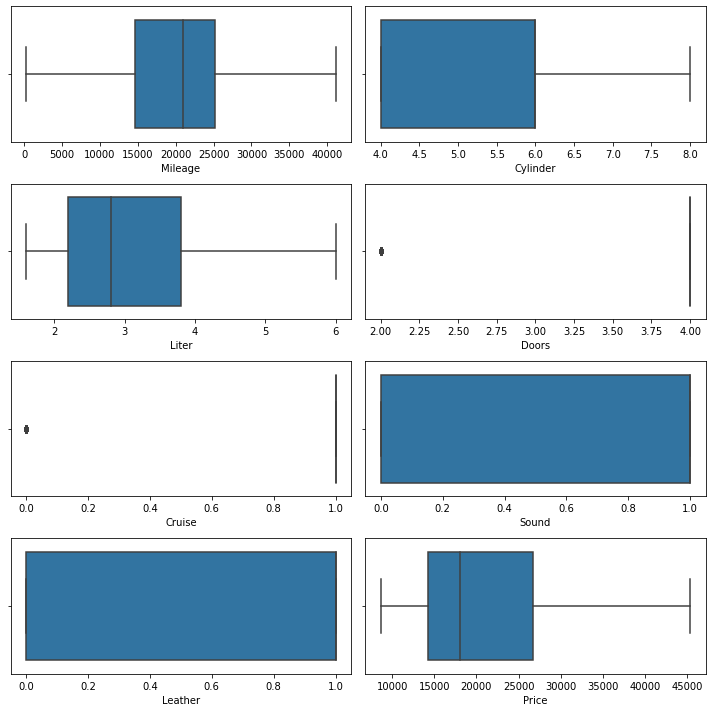

In [ ]:
import warnings                          
warnings.filterwarnings('ignore')           
feature = df1.keys()                  
i = len(feature)
j = 7
plt.figure(figsize = (10, 10))
for k in feature:
  plt.subplot(4, 2, i-j)
  sns.boxplot(df1[k])
  j-=1
plt.tight_layout()
plt.show()


In [ ]:
df1[['Mileage','Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather','Price']].value_counts()

Mileage   Cylinder  Liter  Doors  Cruise  Sound  Leather  Price       
266.00    4         1.6    4      1       0      1        10813.343521    1
23621.00  6         3.5    4      0       1      1        16993.780328    1
23335.00  6         3.4    2      0       1      1        14703.136868    1
23359.00  6         3.6    4      1       1      1        19774.249066    1
23371.00  8         5.7    4      1       0      1        43892.467880    1
                                                                         ..
17488.00  6         3.5    4      0       1      1        17986.224091    1
17508.00  8         4.6    4      1       0      1        32501.245189    1
17583.00  6         3.8    4      1       1      0        20318.890973    1
17590.00  4         2.0    2      1       1      1        33358.767771    1
41097.25  8         4.6    4      1       1      1        32537.186751    1
Length: 804, dtype: int64

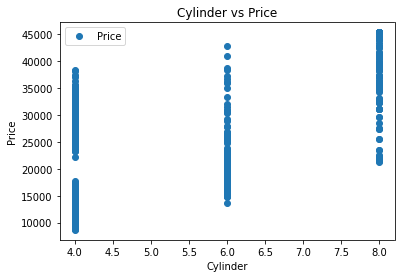

In [ ]:
df1.plot(x = "Cylinder", y = "Price", style = "o")

plt.title("Cylinder vs Price")
plt.ylabel("Price")
plt.show()



In [ ]:
df1[['Cylinder', 'Price']].corr()



,Cylinder,Price
Cylinder,1.000000,0.569795
Price,0.569795,1.000000


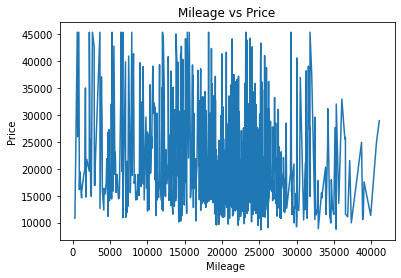

In [ ]:
df1.groupby('Mileage')['Price'].mean().plot()
plt.title('Mileage vs Price')
plt.xlabel('Mileage ')
plt.ylabel('Price')
plt.show()



In [ ]:
df1[['Mileage', 'Price']].corr()


,Mileage,Price
Mileage,1.000000,-0.138997
Price,-0.138997,1.000000


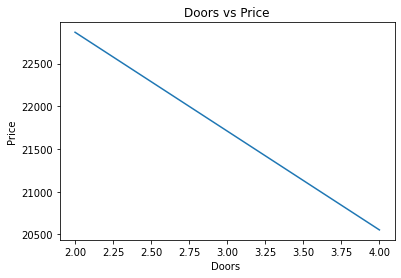

In [ ]:
df1.groupby('Doors')['Price'].mean().plot()
plt.title('Doors vs Price')
plt.xlabel('Doors ')
plt.ylabel('Price')
plt.show()

In [ ]:
df1[['Doors', 'Price']].corr()


,Doors,Price
Doors,1.000000,-0.108917
Price,-0.108917,1.000000


In [ ]:
X = df1.loc[:, ['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']].values 
y = df1.loc[:, 'Price'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)


In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [ ]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()   
regressor.fit(X_train_scaled, y_train)

y_pred = regressor.predict(X_test_scaled) 
y_pred

array([21427.1661206 , 17796.40510006, 12073.11914181, 23099.16282218,
       12073.11914181, 32112.89725179, 31255.57064165, 20650.05519739,
       27313.9142582 , 33018.78219156, 33018.78219156, 15368.74630566,
       21633.32548966, 12600.77496206, 15368.74630566, 18827.83564886,
       29433.35109312, 14422.9945106 , 18029.47636633, 18827.83564886,
       15280.32112074, 24634.36809953, 15620.63366993, 14422.9945106 ,
       26936.08321179, 18827.83564886, 18953.77933099, 18953.77933099,
       32112.89725179, 20398.16783312, 21427.1661206 , 21633.32548966,
       24382.48073526, 35698.32835023, 24106.71227927, 21633.32548966,
       27313.9142582 , 18029.47636633, 12600.77496206, 18324.06092031,
       20650.05519739, 17442.85321846, 18575.94828459, 14422.9945106 ,
       18048.29246433, 18953.77933099, 13895.33869034, 23626.81864244,
       23099.16282218, 21427.1661206 , 18029.47636633, 18827.83564886,
       23374.93127817, 18827.83564886, 18827.83564886, 18300.1798286 ,
      

In [ ]:
df_coff = pd.DataFrame(regressor.coef_ , ['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], columns= ['Cofficient'])
df_coff

,Cofficient
Cylinder,2631.413945
Liter,1410.557510
Doors,-775.949547
Cruise,2645.663863
Sound,-1240.415347
Leather,1429.980491


In [ ]:
print(regressor.intercept_) 


21248.695503603118


In [ ]:
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))


R2- SCORE: 0.43560037860291867


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train_scaled, y_train)
print(list(zip(['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],sfs.get_support())))

[('Cylinder', False), ('Liter', True), ('Doors', False), ('Cruise', True), ('Sound', False), ('Leather', False)]


## **Task 3**

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
 df_dummy = pd.get_dummies(df,columns = ['Make','Model','Type'])



In [ ]:
df_dummy

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Sedan 4D,6,3.1,4,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Sedan 4D,6,3.1,4,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,L300 Sedan 4D,6,3.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19095,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20484,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25979,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
x = df_dummy[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Make_Buick', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Cadillac', 'Make_Saturn','Type_Sedan', 'Type_Coupe', 'Type_Wagon', 'Type_Hatchback', 'Type_Convertible']]
y = df_dummy['Price']

model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [ ]:
print(
'Coefficient:',model.coef_,
'\nIntercept:',model.intercept_,    
'\nScore:',model.score(x,y)
)

Coefficient: [-1.84862466e-01 -1.22610774e+03  5.76120797e+03 -2.06693208e+03
  1.11145653e+02  2.95622523e+02  2.34258573e+02 -3.58669276e+03
 -5.33495094e+03 -5.47974129e+03  6.95098389e+03  1.22732515e+04
 -4.82285042e+03 -1.69110942e+03 -5.49471851e+03  2.37758514e+03
 -1.71994175e+03  6.52818455e+03] 
Intercept: 23983.77190961674 
Score: 0.9363889951039477


In [ ]:
print(df_dummy)

            Price  Mileage           Trim  Cylinder  Liter  Doors  Cruise  \
0    17314.103129     8221       Sedan 4D         6    3.1      4       1   
1    17542.036083     9135       Sedan 4D         6    3.1      4       1   
2    16218.847862    13196       Sedan 4D         6    3.1      4       1   
3    16336.913140    16342       Sedan 4D         6    3.1      4       1   
4    16339.170324    19832       Sedan 4D         6    3.1      4       1   
..            ...      ...            ...       ...    ...    ...     ...   
799  16507.070267    16229  L300 Sedan 4D         6    3.0      4       1   
800  16175.957604    19095  L300 Sedan 4D         6    3.0      4       1   
801  15731.132897    20484  L300 Sedan 4D         6    3.0      4       1   
802  15118.893228    25979  L300 Sedan 4D         6    3.0      4       1   
803  13585.636802    35662  L300 Sedan 4D         6    3.0      4       1   

     Sound  Leather  Make_Buick  ...  Model_STS-V6  Model_STS-V8  \
0      